# Synopsis

We now apply PCA to our corpus of novels, using the same reduced TFIDF matrix we used for HCA.

# Configuration

In [1]:
db_file = '../../data/novels.db'

# Libraries

In [2]:
import sqlite3
import pandas as pd
import numpy as np

from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Pragmas

In [3]:
%matplotlib inline

# Process

## Import data

In [4]:
with sqlite3.connect(db_file) as db:
    bags = pd.read_sql("SELECT * FROM bag", db, index_col='bag_id')
    tfidf = pd.read_sql("SELECT * FROM tfidf_small", db, index_col=['bag_id','term_id'])    
    vocab = pd.read_sql("select * from vocab", db, index_col='term_id')

## Unpack TFIDF

In [5]:
TFIDF = tfidf.unstack()
TFIDF.columns = TFIDF.columns.droplevel(0)
vocab_idx = TFIDF.columns

## Run PCA

In [6]:
pca = PCA(n_components=10)
projected = pca.fit_transform(normalize(TFIDF.values, norm='l2'))

In [7]:
bags.loc[0].genre

'd'

## Plot results

In [8]:
def plot_pca(subspace, labels, pc_x = 0, pc_y = 1, figsize=(15, 10), annotate=False):
    plt.figure(figsize=figsize)
    plt.scatter(projected[:, pc_x], 
                projected[:, pc_y],
                c=labels, 
                edgecolor='none', 
                alpha=0.5,
                cmap=plt.cm.get_cmap('terrain', 10))
    plt.xlabel('PC{}'.format(pc_x))
    plt.ylabel('PC{}'.format(pc_y))
    if annotate:
        for i, x in enumerate(subspace):
            plt.annotate(bags.loc[i].author, (x[pc_x], x[pc_y])) # SHOULD BE AN FUNCTION ARG

In [9]:
genres = bags.genre
letters = genres.unique().tolist()
genre_ids = genres.apply(lambda x: letters.index(x)).values

### PC0 vs PC1

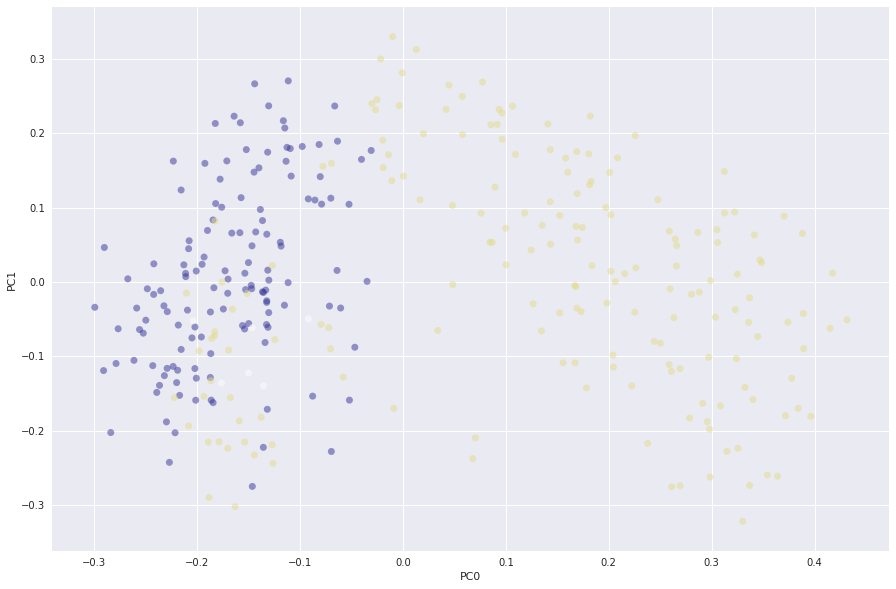

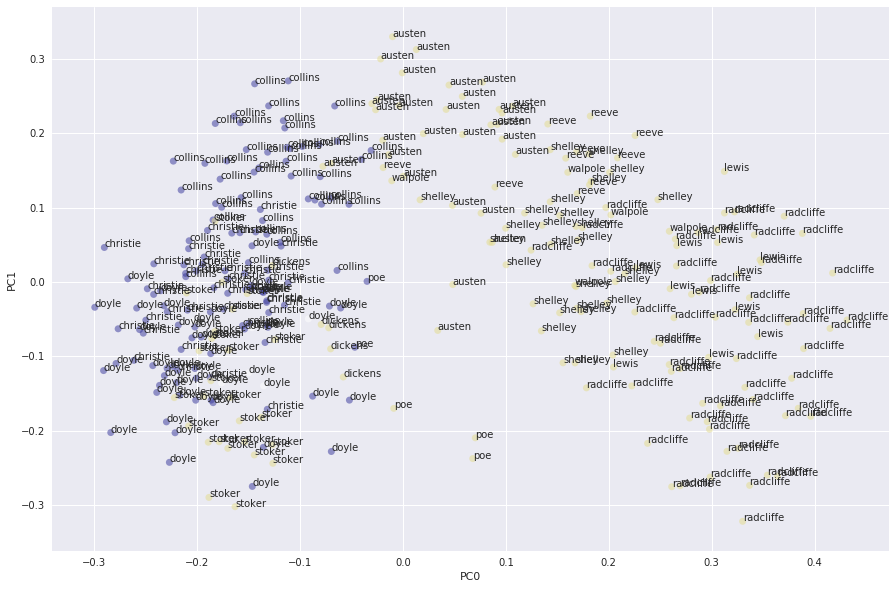

In [10]:
plot_pca(projected, genre_ids, 0, 1)
plot_pca(projected, genre_ids, 0, 1, annotate=True)

### PC1 vs PC2

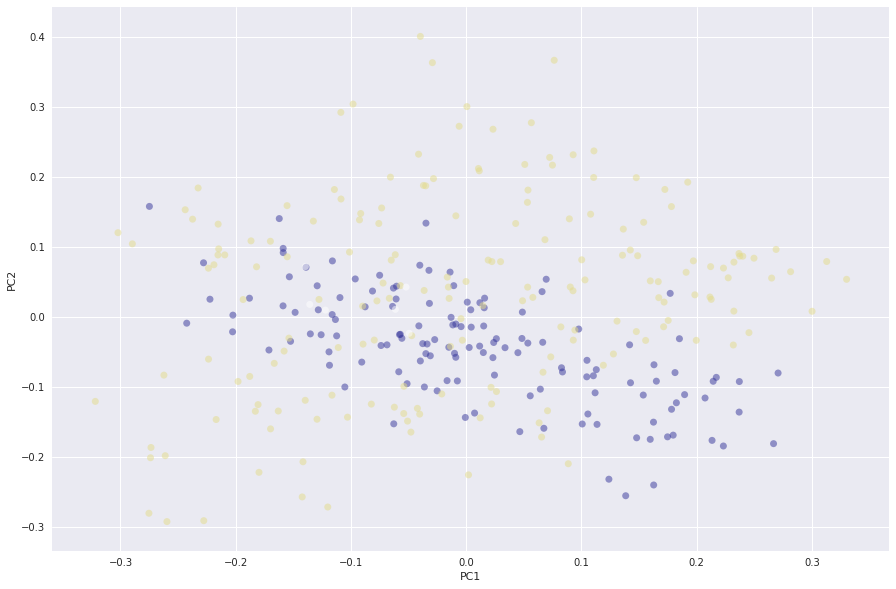

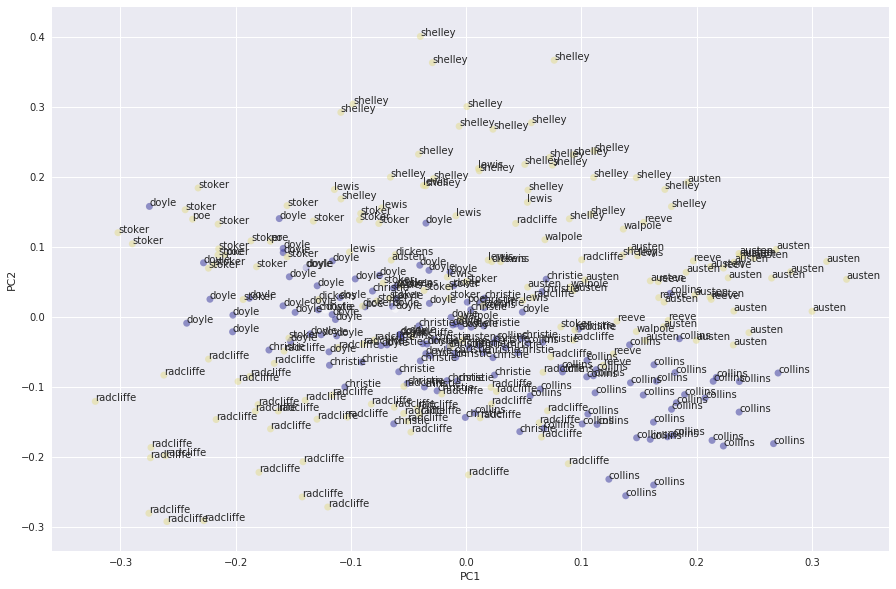

In [11]:
plot_pca(projected, genre_ids, 1, 2)
plot_pca(projected, genre_ids, 1, 2, annotate=True)

### PC2 vs PC3

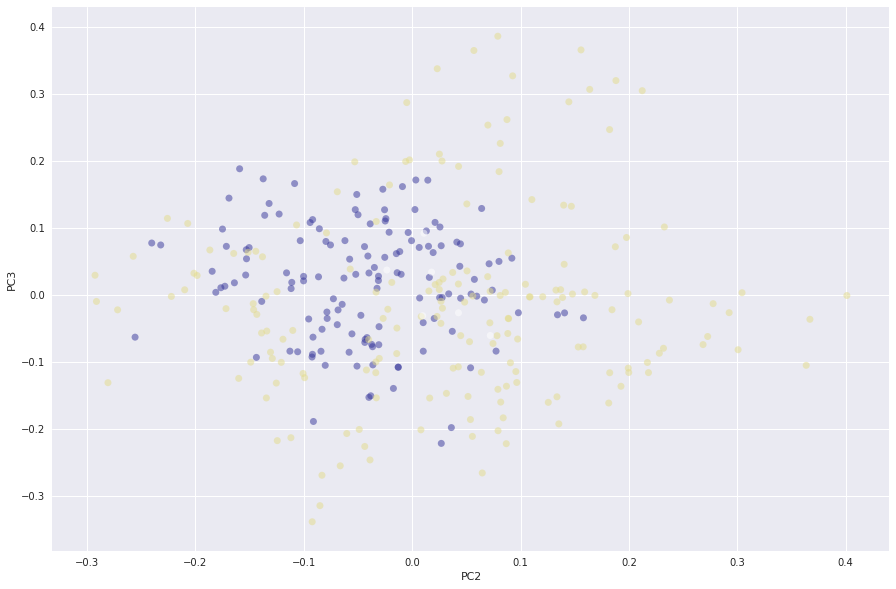

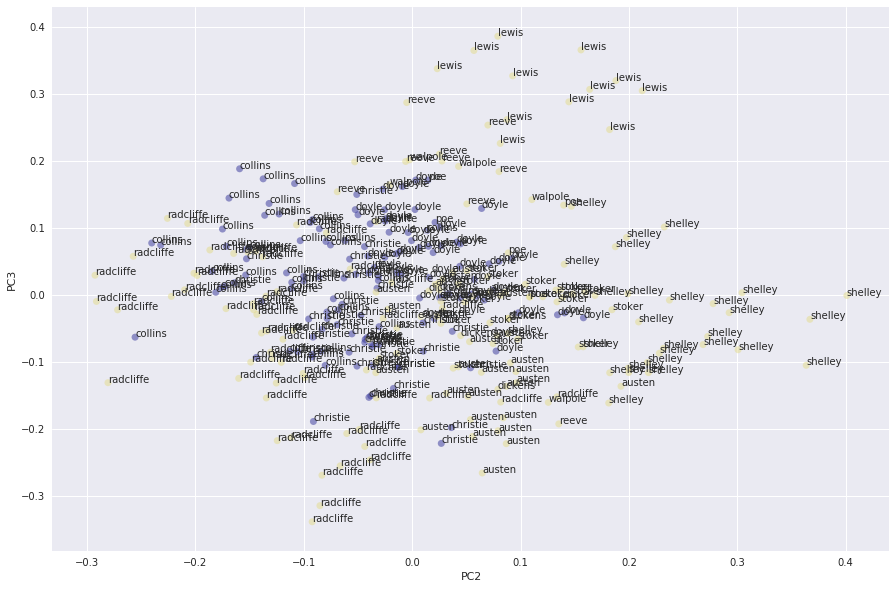

In [12]:
plot_pca(projected, genre_ids, 2, 3)
plot_pca(projected, genre_ids, 2, 3, annotate=True)

## View component loadings

We now explore the contribution of specific features (terms) to the components. Note that we could save the PCA values to our vocabulary table, or to a separate table with the restricted terms only.

In [13]:
COMPS = pd.DataFrame(pca.components_.T * np.sqrt(pca.explained_variance_))
COMPS.columns = ["PC{}".format(i) for i in COMPS.columns]
COMPS.index = vocab_idx

In [14]:
vshort = vocab.loc[vocab_idx]

In [15]:
vshort = pd.concat([vshort, COMPS], axis=1)

In [16]:
vshort.head()

,term_str,n,p,port_stem,stop,df,idf,tfidf_sum,tfidf_mean,tfidf_max,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
term_id,,,,,,,,,,,,,,,,,,,,
4,abandoned,68,0.000045,abandon,0,43,0.871682,59.274344,0.185232,6.101771,0.001553,-0.002526,0.003813,0.005393,0.001038,0.004152,0.000422,0.005548,0.002771,-0.001998
50,able,315,0.000210,abl,0,173,0.267104,84.137721,0.262930,1.602623,-0.005361,-0.001274,0.001767,0.000688,-0.003774,-0.000624,-0.003242,-0.000557,-0.002955,0.000130
91,absolute,60,0.000040,absolut,0,43,0.871682,52.300891,0.163440,4.358408,-0.001644,-0.002881,0.000668,0.002933,-0.001983,-0.000204,-0.001992,0.001031,-0.002641,-0.001812
92,absolutely,115,0.000077,absolut,0,72,0.647817,74.499010,0.232809,3.886905,-0.005732,-0.003047,-0.001859,0.005218,-0.002100,0.002830,-0.001001,0.000993,-0.001205,-0.002781
134,accepted,90,0.000060,accept,0,61,0.719820,64.783813,0.202449,3.599101,0.002842,0.003139,-0.002993,0.001024,-0.000517,0.002204,-0.003277,-0.001707,0.000920,-0.000545


### PC0 loadings

We note that PC0 clearly distinguishes between Gothic and Detective fiction, but cannot distinguish betwen Poe and Austen, who reside in the middle of the spectrum.

In [17]:
vshort.sort_values('PC0', ascending=False)[['term_str','PC0']]

,term_str,PC0
term_id,,
13949,length,0.025284
4779,concerning,0.024891
17414,perceived,0.024310
7114,distant,0.019372
446,affection,0.019146
20999,scene,0.018709
8100,endeavoured,0.018549
24027,tenderness,0.018056
11124,happiness,0.017959


### PC1 loadings

PC1 does distinguish between Poe and Austen.

In [18]:
vshort.sort_values('PC1', ascending=False)[['term_str','PC1']]

,term_str,PC1
term_id,,
16112,nightgown,0.022441
230,acquaintance,0.015337
8511,everybody,0.013937
1010,anybody,0.013569
553,agreeable,0.013491
5913,dance,0.012761
20952,says,0.012471
6778,directly,0.011584
446,affection,0.010390


### PC2 loadings

In [19]:
vshort.sort_values('PC2', ascending=False)[['term_str','PC2']]

,term_str,PC2
term_id,,
11949,ice,0.023064
21331,sensations,0.016070
15327,misery,0.015669
9173,feelings,0.014388
8700,existence,0.011424
23890,task,0.011423
2129,beheld,0.011257
5561,creatures,0.011069
14384,lovely,0.010906


# Conclusion

| &nbsp; | PC0 | PC1 |
|----|---|-----|
| Gothic | + | 0 |
| Detective | - | 0 |
| Poe | 0 | - |
| Austen | 0 | + |
